# Universidade do Estado do Amazonas - Microeconomia II
### Modelo do mercado com duas curvas de demandas lineares e monopólio

Prof. Bruno de Melo Ruas


## Sistemas de Equações

- Curvas de Demanda Inversa Linear:  
    - $ p_1(y_1) = 100 - y_1 $
    - $ p_2(y_2) = 50 - y_2/2 $
    - $ p(y_1 + y_2) = 150 - 3p $
- Funções de Receita:
    - $ r(y_1) = p_1(y_1)y_1 = 100y_1 + y_{1}^{2} $
    - $ r(y_2) = p_2(y_2)y_2 = 50y_2 - y^2 $
    - $ r(y_1) + r(y_2) = p_1(y_1)y_1 + p_2(y_2)y_2 = 100y_1 - 50y_2 + y_{1}^{2} + y_2 $
- Função Receita Marginal: 
    - $ RMa_1(y_1) = 100 - 2y_1 $
    - $ RMa_2(y_2) = 50 - y^2 $
- Função Custo Total: 
    - $ c(y_1 + y_2) = CF + 20(y_1 + y_2) $
- Função Custo Marginal: 
    - $ CMa(y1+y_2) = 20 $


In [62]:
# Modulos usados
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Constantes usadas nas equações:
a1 = 100
b1 = 1

a2 = 50
b2 = 1/2

CF = 0 # custo fixo
CV = 20 # custo variavel

# Modelo
x = np.linspace(0,100,1000) # espaco linear

dem_lin1 = a1 - b1 * x
dem_lin2 = a2 - b2 * x

receita1 = dem_lin1 * x
receita2 = dem_lin2 * x

rec_marg1 = 100 - 2 * x
rec_marg2 = 50 - x

c_total = CV * x
c_marginal = CV

lucro1 = receita1 - c_total
lucro2 = receita2 - c_total

# Dataframe
dataframe = pd.DataFrame()
dataframe['x'] = x
dataframe['dem_lin1'] = dem_lin1
dataframe['dem_lin2'] = dem_lin2

dataframe['receita1'] = receita1
dataframe['receita2'] = receita2

dataframe['rec_marg1'] = rec_marg1
dataframe['rec_marg2'] = rec_marg2

dataframe['c_total'] = c_total
dataframe['c_marginal'] = c_marginal

dataframe['lucro1'] = lucro1
dataframe['lucro2'] = lucro2

# pontos de maximo lucro grafico 1
A = dataframe[dataframe['lucro1'] == max(dataframe['lucro1'])]['x'].index[0]
A = [dataframe['x'].iloc[A],dataframe['dem_lin1'].iloc[A]]

B = dataframe[dataframe['lucro2'] == max(dataframe['lucro2'])]['x'].index[0]
B = [dataframe['x'].iloc[B],dataframe['dem_lin2'].iloc[B]]

# pontos de maximo lucro grafico 2
A2 = dataframe[dataframe['lucro1'] == max(dataframe['lucro1'])]['x'].index[0]
A2 = [dataframe['x'].iloc[A2],dataframe['lucro1'].iloc[A2]]

B2 = dataframe[dataframe['lucro2'] == max(dataframe['lucro2'])]['x'].index[0]
B2 = [dataframe['x'].iloc[B2],dataframe['lucro2'].iloc[B2]]

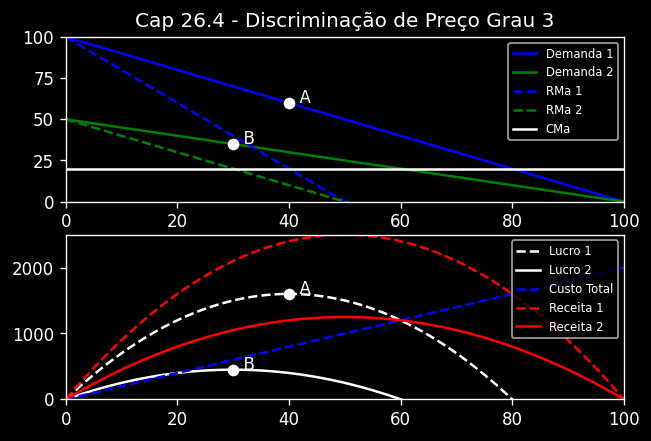

In [63]:
# Gerando o gráfico
fig = plt.figure(dpi=120)
ax = plt.axes()
ax.grid(color='gray',linewidth=.2)

plt.subplot(2,1,1) # rows, columns, panel number

plt.title('Cap 26.4 - Discriminação de Preço Grau 3')

plt.plot(dataframe['x'], dataframe['dem_lin1'],'-',color='blue', label='Demanda 1')
plt.plot(dataframe['x'], dataframe['dem_lin2'],'-',color='green', label='Demanda 2')
plt.plot(dataframe['x'], dataframe['rec_marg1'],'--',color='blue', label='RMa 1')
plt.plot(dataframe['x'], dataframe['rec_marg2'],'--',color='green', label='RMa 2')
plt.plot(dataframe['x'], dataframe['c_marginal'],'-',color='white', label='CMa')
plt.legend(loc='upper right', fontsize=7)
plt.ylim(0,max(dataframe['dem_lin1']))
plt.xlim(0,max(x))

# adding points with a label
coord = A
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate('  A',(coord[0],coord[1]))

coord = B
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate('  B',(coord[0],coord[1]))


plt.subplot(2,1,2) # rows, columns, panel number
plt.plot(dataframe['x'], dataframe['lucro1'],'--',color='white', label='Lucro 1')
plt.plot(dataframe['x'], dataframe['lucro2'],'-',color='white', label='Lucro 2')
plt.plot(dataframe['x'], dataframe['c_total'],'--',color='blue', label='Custo Total')
plt.plot(dataframe['x'], dataframe['receita1'],'--',color='red', label='Receita 1')
plt.plot(dataframe['x'], dataframe['receita2'],'-',color='red', label='Receita 2')

plt.legend(loc='upper right', fontsize=7)
plt.ylim(0,max(dataframe['receita1']))
plt.xlim(0,max(x))

# adding points with a label
coord = A2
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate('  A',(coord[0],coord[1]))

coord = B2
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate('  B',(coord[0],coord[1]))

plt.show()